In [3]:
from bcb import sgs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as sbn
import datetime
import sklearn as sk
import statsmodels.api
import statsmodels.api as sm

In [4]:
renda=sgs.get({'renda':29023}, start = '2005-01-01', end = '2010-12-01')
consumo=sgs.get({'consumo familias':22110}, start = '2005-01-01', end = '2010-12-01')

In [3]:
consumo2=consumo.reset_index()
consumo2.head()

,Date,consumo familias
0,2005-01-01,119.73
1,2005-04-01,120.33
2,2005-07-01,122.21
3,2005-10-01,123.98
4,2006-01-01,125.67


In [5]:
renda2=renda

In [8]:
renda3=renda2.reset_index()
renda3.head()

,Date,renda
0,2005-01-01,113.470
1,2005-02-01,113.080
2,2005-03-01,110.177
3,2005-04-01,109.568
4,2005-05-01,110.659


In [52]:
renda4=renda3[renda3['Date'].dt.month.isin([1,4,7,10])]

In [58]:
consumo2.reset_index(drop=True, inplace=True)

In [62]:
renda4.reset_index(drop=True, inplace=True)

In [63]:
renda_consumo=pd.concat([renda4,consumo2], axis=1)
renda_consumo.head(25)

,Date,renda,Date,consumo familias
0,2005-01-01,113.470,2005-01-01,119.73
1,2005-04-01,109.568,2005-04-01,120.33
2,2005-07-01,118.490,2005-07-01,122.21
3,2005-10-01,119.060,2005-10-01,123.98
4,2006-01-01,126.808,2006-01-01,125.67
5,2006-04-01,119.286,2006-04-01,127.27
6,2006-07-01,129.264,2006-07-01,128.59
7,2006-10-01,132.447,2006-10-01,130.44
8,2007-01-01,138.778,2007-01-01,133.70
9,2007-04-01,135.614,2007-04-01,135.08


In [67]:
rendaconsumo=renda_consumo.iloc[0:24]

<AxesSubplot:xlabel='renda', ylabel='consumo familias'>

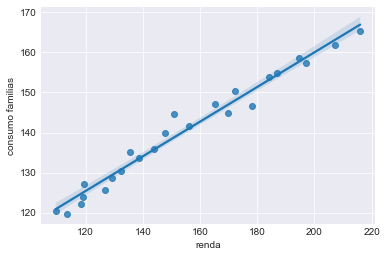

In [68]:
sns.regplot(x='renda', y='consumo familias', data=rendaconsumo)

In [69]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
model = LinearRegression()
X=rendaconsumo['renda']
y=rendaconsumo['consumo familias']

In [70]:
y1=y.values.reshape(-1,1)
X1=X.values.reshape(-1,1)

In [71]:
variables = list(rendaconsumo.columns)
y1 = rendaconsumo['consumo familias']
X1 = rendaconsumo['renda']
x = [var for var in variables if var not in y ]

# Ordinary least squares regression
model_Simple = y1, X1

# Add a constant term like so:
model = sm.OLS(y1, sm.add_constant(X1)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       consumo familias   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     839.0
Date:                Mon, 30 May 2022   Prob (F-statistic):           5.16e-19
Time:                        11:35:02   Log-Likelihood:                -52.775
No. Observations:                  24   AIC:                             109.6
Df Residuals:                      22   BIC:                             111.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.4786      2.357     31.171      0.000      68.590      78.367
renda          0.4328      0.015     28.965      0.000       0.402       0.464
==============================================================================
Omnibus:                        1.972   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.373   Jarque-Bera (JB):                1.043
Skew:                           0.504   Prob(JB):                        0.594
Kurtosis:                       3.167   Cond. No.                         800.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
#aumento na renda de R$1 leva a aumento no consumo de 0,43 centavos
# y=73,4786+0,4328x

In [73]:
# o modelo explica em até 97% a variação do consumo em relação à renda